<a href="https://colab.research.google.com/github/felipelarraguibel-art/Portafolio/blob/main/Sm17_Examen_FelipeL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [1]:
%pip install wbgapi

In [2]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2/')
import my_func as fn



Mounted at /content/drive


In [3]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [4]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [5]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [6]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [7]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [8]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


# **Etapa 1**

**Revisión general del dataset**

Identificar el número de países, años y variables disponibles.

Número total de observaciones

Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

Identificación de outliers relevantes

Otras observaciones relevante

In [9]:
# 1.
# Identificar el número de países
num_paises = df_wb_raw['Country'].nunique()

#  Identificar el número de años
# Basado en la descarga de datos previa (años=2023), sabemos que es un solo año.
num_años = 1

#  Identificar el número de variables (indicadores)
# Se excluyen las columnas 'country' (código ISO) y 'Country' (nombre del país)
num_variables = df_wb_raw.shape[1] - 2

print(f"Número de países únicos: {num_paises}")
print(f"Número de años cubiertos: {num_años} (datos del año 2023)")
print(f"Número de variables (indicadores): {num_variables}")


Número de países únicos: 198
Número de años cubiertos: 1 (datos del año 2023)
Número de variables (indicadores): 65


In [10]:
# 2. Número total de observaciones
num_total_observaciones = df_wb_raw.shape[0]
print(f"Número total de observaciones: {num_total_observaciones}")

Número total de observaciones: 198


In [11]:
# 3.
# Porcentaje de datos faltantes por variable
missing_data = df_wb_raw.isnull().sum()
total_rows = len(df_wb_raw)
missing_percentage = (missing_data / total_rows) * 100

print("\nPorcentaje de datos faltantes por variable:\n")
# Filtramos para mostrar solo las variables con datos faltantes
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

# Variables a eliminar (>= 15% de datos faltantes)
variables_to_drop = missing_percentage[missing_percentage >= 15].index.tolist()

# Variables a imputar (< 15% de datos faltantes)
variables_to_impute = missing_percentage[missing_percentage < 15].index.tolist()

print(f"\nVariables recomendadas para ELIMINAR (>= 15% NA): {variables_to_drop}")
print(f"Variables recomendadas para IMPUTAR (< 15% NA): {variables_to_impute}")



Porcentaje de datos faltantes por variable:

SE.PRM.NENR.MA             100.000000
SE.PRM.NENR.FE             100.000000
SE.PRM.NENR                100.000000
GC.TAX.EXPT.ZS              83.333333
GC.TAX.EXPT.CN              83.333333
GC.DOD.TOTL.CN              82.828283
GC.DOD.TOTL.GD.ZS           82.828283
IT.NET.USER.FE.ZS           71.212121
IT.NET.USER.MA.ZS           71.212121
EG.ELC.LOSS.ZS              64.646465
EG.USE.ELEC.KH.PC           64.141414
SL.UEM.TOTL.MA.NE.ZS        46.969697
SL.UEM.TOTL.NE.ZS           46.969697
SL.UEM.TOTL.FE.NE.ZS        46.969697
SE.TER.ENRR.MA              38.383838
SE.TER.ENRR.FE              38.383838
SE.TER.ENRR                 37.878788
SE.SEC.ENRR.MA              32.323232
SE.SEC.ENRR.FE              31.818182
SE.SEC.ENRR                 30.303030
NE.EXP.GNFS.KD.ZG           20.202020
NE.EXP.GNFS.KN              20.202020
NE.CON.GOVT.KN              20.202020
NE.CON.PRVT.CD              18.181818
NE.CON.PRVT.CN              18.181818
NE.C


--- Identificación de Outliers (gráficos de caja) ---


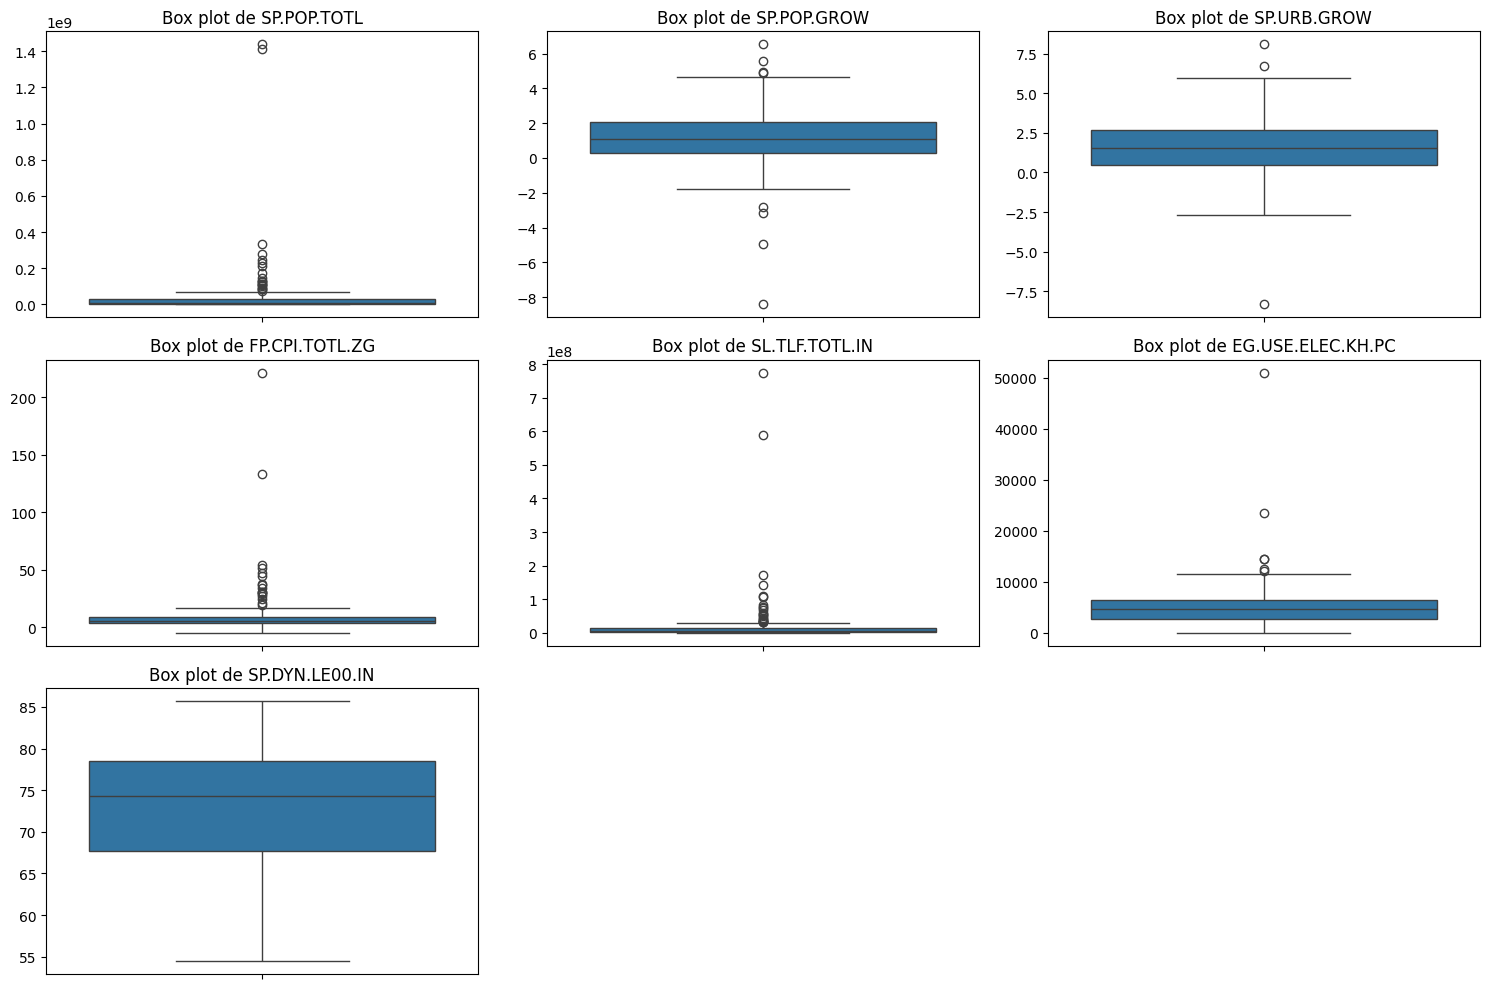


--- Otras Observaciones Relevantes ---

Basado en los gráficos de caja, busca valores que se extienden significativamente más allá de los 'bigotes'.
Estos puntos individuales fuera de los bigotes son posibles outliers. Considera su contexto antes de decidir cómo tratarlos.

También, considera si hay alguna característica general del dataset, como la distribución geográfica de los países, la concentración de datos en ciertos rangos, o cualquier otro patrón que no haya sido cubierto por los análisis anteriores.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir columnas no numéricas y la variable objetivo discretizada
numeric_cols = df_wb_raw.select_dtypes(include=['number']).columns.tolist()

# Filtrar las columnas numéricas para evitar errores si alguna ya fue eliminada o cambiada de tipo
# También se puede excluir la columna 'NY.GDP.MKTP.PP.KD' si ya está discretizada y no es numérica.
# Aunque en este caso, .select_dtypes(include=['number']) ya la excluiría si es categórica.

print("\n--- Identificación de Outliers (gráficos de caja) ---")

# Seleccionar un subconjunto de variables numéricas para visualizar
# Para evitar generar demasiados gráficos, seleccionaremos algunas variables clave.
# Si quieres ver todas las numéricas, puedes iterar sobre `numeric_cols`.

# Ejemplo con algunas variables numéricas que no tienen 100% NA y pueden ser relevantes
selected_numerical_for_outliers = [
    'SP.POP.TOTL', 'SP.POP.GROW', 'SP.URB.GROW', 'FP.CPI.TOTL.ZG',
    'SL.TLF.TOTL.IN', 'EG.USE.ELEC.KH.PC', 'SP.DYN.LE00.IN'
]

# Asegurarse de que las columnas seleccionadas realmente existan en numeric_cols
selected_numerical_for_outliers = [col for col in selected_numerical_for_outliers if col in numeric_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_for_outliers):
    plt.subplot(3, 3, i + 1)  # Ajusta el layout de los subplots según el número de variables
    sns.boxplot(y=df_wb_raw[col].dropna()) # Usa .dropna() para evitar errores con NaNs en boxplot
    plt.title(f'Box plot de {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n--- Otras Observaciones Relevantes ---")
print("\nBasado en los gráficos de caja, busca valores que se extienden significativamente más allá de los 'bigotes'.")
print("Estos puntos individuales fuera de los bigotes son posibles outliers. Considera su contexto antes de decidir cómo tratarlos.")
print("\nTambién, considera si hay alguna característica general del dataset, como la distribución geográfica de los países, la concentración de datos en ciertos rangos, o cualquier otro patrón que no haya sido cubierto por los análisis anteriores.")


**Indicaciones:**

Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

Mapa con la distribución del PIB

Discretizar la variable dependiente NY.GDP.MKTP.PP.KD de aceurdo con la siguiente indicación.

df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


In [13]:
# Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

import pandas as pd

# Seleccionar solo las columnas numéricas para las estadísticas descriptivas
numeric_df = df_wb_raw.select_dtypes(include=['number'])

# Generar la tabla de estadísticas descriptivas: media, mediana (50%), desviación estándar, máximo, mínimo
desc_stats = numeric_df.describe().loc[['mean', '50%', 'std', 'max', 'min']]

print("\nTabla de Estadísticas Descriptivas:\n")
display(desc_stats)


Tabla de Estadísticas Descriptivas:



,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.TLF.TOTL.FE.ZS,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
mean,1.152752,3.999611e+07,1.987776e+07,49.973491,2.011836e+07,50.026509,1.729545,2.289674e+07,62.205392,41.898361,...,60.958578,45.456089,76.119303,73.476060,70.910354,62.271154,78.501099,87.190260,88.240505,72.290555
50%,1.112108,7.335048e+06,3.672054e+06,50.329281,3.560820e+06,49.670719,1.524572,4.463172e+06,63.622523,45.081945,...,63.036400,44.203554,77.486500,74.292890,70.666000,84.150000,97.600000,89.829000,90.538300,81.722100
std,1.576210,1.484957e+08,7.252840e+07,2.993389,7.598056e+07,2.993389,1.826024,8.019058e+07,22.722526,9.018596,...,35.784689,28.107669,7.221813,7.085527,7.104323,41.324522,32.394985,13.774667,12.542169,24.224349
max,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,8.105580,9.244403e+08,100.000000,54.670843,...,171.113083,159.586578,88.090000,85.706000,84.206000,100.000000,100.000000,100.000000,100.000000,100.000000
min,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,-8.348151,6.283000e+03,15.058102,6.846247,...,4.663074,2.806122,54.743000,54.462000,53.195000,0.000000,0.100000,16.697100,19.497300,11.078400


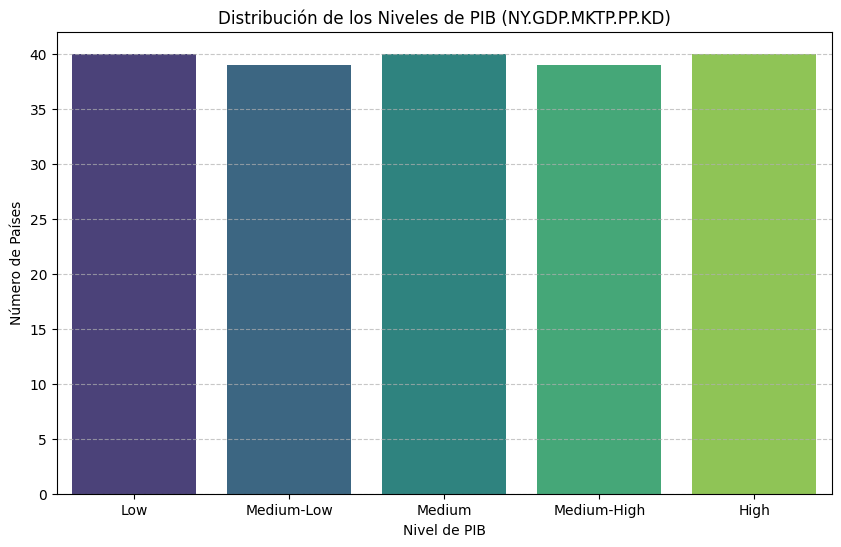

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar la distribución del PIB (variable objetivo discretizada)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_wb_raw['NY.GDP.MKTP.PP.KD'], hue=df_wb_raw['NY.GDP.MKTP.PP.KD'], order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], palette='viridis', legend=False)
plt.title('Distribución de los Niveles de PIB (NY.GDP.MKTP.PP.KD)')
plt.xlabel('Nivel de PIB')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
import plotly.express as px

# Definir un mapa de colores discreto para las categorías de PIB
color_map_gdp = {
    'Low': 'red',
    'Medium-Low': 'orange',
    'Medium': 'yellow',
    'Medium-High': 'lightgreen',
    'High': 'green'
}

fig = px.choropleth(df_wb_raw,
                    locations="country", # Columna con códigos ISO de país
                    color="NY.GDP.MKTP.PP.KD", # Columna a usar para colorear el mapa
                    hover_name="Country", # Mostrar el nombre completo del país al pasar el ratón
                    color_discrete_map=color_map_gdp, # Mapa de colores personalizado
                    title="Distribución del Nivel de PIB por País (2023)",
                    projection="natural earth") # Tipo de proyección del mapa

fig.show()


**Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

Seleccionar únicamente variables numéricas y estandarizarlas previamente.

Aplicar PCA y analizar la varianza explicada por cada componente.
Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.

In [16]:
import numpy as np

# 1. Crea una copia del DataFrame df_wb_raw
df_preprocessed = df_wb_raw.copy()

# 2. Elimina las columnas identificadas previamente en variables_to_drop
df_preprocessed = df_preprocessed.drop(columns=variables_to_drop)

# 3. Para las columnas identificadas en variables_to_impute, imputa los valores faltantes utilizando la mediana de cada columna.
# Asegúrate de que estas columnas sean numéricas antes de la imputación.
for col in variables_to_impute:
    if col in df_preprocessed.columns and pd.api.types.is_numeric_dtype(df_preprocessed[col]):
        median_value = df_preprocessed[col].median()
        df_preprocessed[col] = df_preprocessed[col].fillna(median_value)
        print(f"Imputada columna '{col}' con la mediana: {median_value}")

# 4. Identifica las columnas que contienen la variable objetivo y las variables de identificación
target_variable = 'NY.GDP.MKTP.PP.KD'
id_variables = ['country', 'Country']

# 5. Crea un nuevo DataFrame que contenga únicamente las variables numéricas preprocesadas,
# excluyendo las variables de identificación y la variable objetivo discretizada.

# Identificar todas las columnas numéricas en el DataFrame preprocesado
numeric_features_for_pca = df_preprocessed.select_dtypes(include=[np.number]).columns.tolist()

# Excluir las columnas de identificación del listado de características numéricas si estuvieran presentes
# (aunque 'country' y 'Country' no deberían ser numéricas, se incluye la verificación para robustez)
numeric_features_for_pca = [col for col in numeric_features_for_pca if col not in id_variables]

# Crear el DataFrame final para PCA
df_for_pca = df_preprocessed[numeric_features_for_pca]

print("\nDataFrame preprocesado para PCA creado con éxito. Primeras 5 filas:")
print(df_for_pca.head())
print(f"\nDimensiones del DataFrame para PCA: {df_for_pca.shape}")
print(f"\nColumnas con valores NA después de la imputación: {df_for_pca.isnull().sum().sum()}")

Imputada columna 'NE.EXP.GNFS.ZS' con la mediana: 37.8166476493913
Imputada columna 'SL.TLF.TOTL.IN' con la mediana: 4220673.0
Imputada columna 'SL.TLF.TOTL.FE.ZS' con la mediana: 45.0819446527757
Imputada columna 'SL.UEM.TOTL.ZS' con la mediana: 5.094
Imputada columna 'SL.UEM.TOTL.MA.ZS' con la mediana: 4.608
Imputada columna 'SL.UEM.TOTL.FE.ZS' con la mediana: 5.532
Imputada columna 'FP.CPI.TOTL.ZG' con la mediana: 5.87110177678988
Imputada columna 'IT.NET.USER.ZS' con la mediana: 81.7221
Imputada columna 'NV.IND.MANF.CN' con la mediana: 113027246500.0
Imputada columna 'NV.IND.MANF.CD' con la mediana: 4795876698.625574
Imputada columna 'EG.CFT.ACCS.RU.ZS' con la mediana: 84.15
Imputada columna 'EG.CFT.ACCS.ZS' con la mediana: 91.5
Imputada columna 'EG.CFT.ACCS.UR.ZS' con la mediana: 97.6
Imputada columna 'NV.AGR.TOTL.CN' con la mediana: 39711718990.7585
Imputada columna 'NV.AGR.TOTL.CD' con la mediana: 3465342538.48272
Imputada columna 'NV.SRV.TOTL.CD' con la mediana: 21718325900.188

In [17]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las características numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_pca)

# Convertir el array escalado de nuevo a un DataFrame para mantener las etiquetas de las columnas (opcional, pero útil)
df_scaled = pd.DataFrame(df_scaled, columns=df_for_pca.columns)

print("Datos estandarizados con éxito. Primeras 5 filas:")
print(df_scaled.head())
print(f"\nDimensiones del DataFrame estandarizado: {df_scaled.shape}")

Datos estandarizados con éxito. Primeras 5 filas:
   SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  \
0     0.333505    -0.159703          -0.156443           0.807138   
1     1.043945    -0.130112          -0.130072           0.179754   
2     0.789018    -0.235149          -0.238846           0.109746   
3    -0.306141     0.407480           0.432973           0.351005   
4     0.745482    -0.267862          -0.272571          -0.157687   

   SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.URB.GROW  SP.URB.TOTL  \
0          -0.162788          -0.807138     0.796773    -0.205983   
1          -0.130127          -0.179754     1.110932    -0.169589   
2          -0.231579          -0.109746     0.529980    -0.230158   
3           0.383074          -0.351005     0.263598     0.192122   
4          -0.263319           0.157687     0.354085    -0.285361   

   SP.URB.TOTL.IN.ZS  SL.TLF.TOTL.FE.ZS  ...  BM.KLT.DINV.CD.WD  \
0          -1.010959           0.890346  ...         

Varianza explicada por cada componente principal:
Componente 1: 0.2631 (Acumulada: 0.2631)
Componente 2: 0.2109 (Acumulada: 0.4740)
Componente 3: 0.1094 (Acumulada: 0.5834)
Componente 4: 0.0875 (Acumulada: 0.6709)
Componente 5: 0.0757 (Acumulada: 0.7466)
Componente 6: 0.0447 (Acumulada: 0.7913)
Componente 7: 0.0338 (Acumulada: 0.8251)
Componente 8: 0.0297 (Acumulada: 0.8548)
Componente 9: 0.0284 (Acumulada: 0.8831)
Componente 10: 0.0260 (Acumulada: 0.9092)
Componente 11: 0.0198 (Acumulada: 0.9289)
Componente 12: 0.0166 (Acumulada: 0.9456)
Componente 13: 0.0136 (Acumulada: 0.9592)
Componente 14: 0.0126 (Acumulada: 0.9718)
Componente 15: 0.0073 (Acumulada: 0.9791)
Componente 16: 0.0059 (Acumulada: 0.9850)
Componente 17: 0.0052 (Acumulada: 0.9902)
Componente 18: 0.0028 (Acumulada: 0.9929)
Componente 19: 0.0026 (Acumulada: 0.9955)
Componente 20: 0.0014 (Acumulada: 0.9969)
Componente 21: 0.0010 (Acumulada: 0.9979)
Componente 22: 0.0007 (Acumulada: 0.9986)
Componente 23: 0.0005 (Acumulada: 0

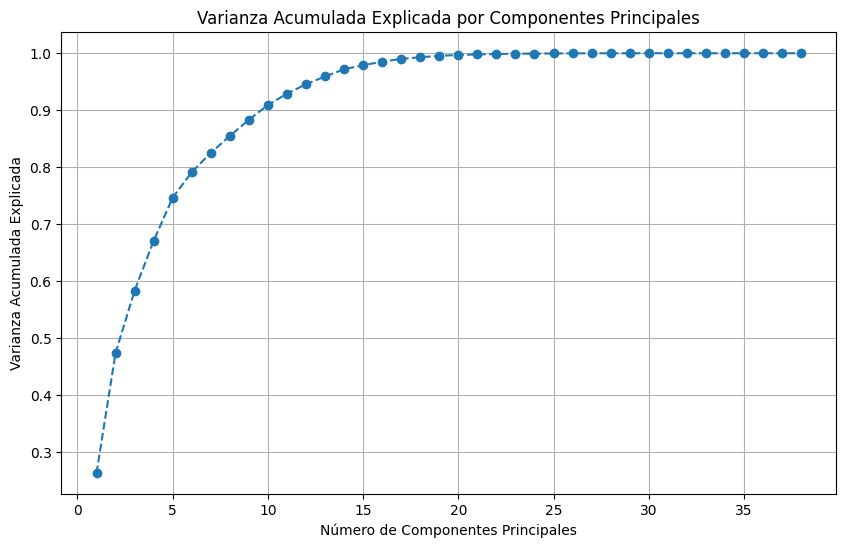


Se eligen 5 componentes principales para explicar el 74.66% de la varianza total.


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA()
pca.fit(df_scaled)

# Analizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {var:.4f} (Acumulada: {cumulative_explained_variance[i]:.4f})")

# Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

# Identificar el número de componentes para explicar entre 70% y 90%
num_components_70_90 = np.where((cumulative_explained_variance >= 0.70) & (cumulative_explained_variance <= 0.90))[0]

if len(num_components_70_90) > 0:
    # Se elige el primer número de componentes que cumple el criterio, típicamente el más bajo para mayor reducción
    selected_num_components = num_components_70_90[0] + 1 # +1 porque el índice es base 0
    print(f"\nSe eligen {selected_num_components} componentes principales para explicar el {cumulative_explained_variance[selected_num_components-1]*100:.2f}% de la varianza total.")
else:
    # Fallback si no se encuentra en el rango exacto, elegir el punto más cercano o el que cumpla el 70%
    selected_num_components = np.where(cumulative_explained_variance >= 0.70)[0][0] + 1
    print(f"\nNo se encontró un número de componentes que explicara exactamente entre 70-90%. Se eligen {selected_num_components} componentes principales para explicar el {cumulative_explained_variance[selected_num_components-1]*100:.2f}% de la varianza total (primer punto >= 70%).")


In [19]:
pca_final = PCA(n_components=selected_num_components)
df_pca_components = pca_final.fit_transform(df_scaled)

# Crear un DataFrame con las componentes principales
pca_columns = [f'PC_{i+1}' for i in range(selected_num_components)]
df_pca = pd.DataFrame(df_pca_components, columns=pca_columns)

# Añadir las variables de identificación y la variable objetivo
df_pca['country'] = df_preprocessed['country']
df_pca['Country'] = df_preprocessed['Country']
df_pca['NY.GDP.MKTP.PP.KD'] = df_preprocessed['NY.GDP.MKTP.PP.KD']

print("DataFrame con Componentes Principales creado con éxito. Primeras 5 filas:")
print(df_pca.head())
print(f"\nDimensiones del DataFrame con PCA: {df_pca.shape}")

DataFrame con Componentes Principales creado con éxito. Primeras 5 filas:
       PC_1      PC_2      PC_3      PC_4      PC_5 country  \
0 -1.824413 -3.718461 -0.139753  1.201409 -0.206234     ZWE   
1 -1.848223 -3.861049 -0.202842 -0.814425 -0.276063     ZMB   
2 -0.841066 -0.284357 -0.042718 -0.170836  0.166311     PSE   
3  1.216174  0.301010  0.993765 -0.286240 -2.085039     VNM   
4 -1.649400 -2.790831 -0.277981 -0.867607 -0.669647     VUT   

              Country NY.GDP.MKTP.PP.KD  
0            Zimbabwe            Medium  
1              Zambia            Medium  
2  West Bank and Gaza        Medium-Low  
3            Viet Nam              High  
4             Vanuatu               Low  

Dimensiones del DataFrame con PCA: (198, 8)




### **Preprocesamiento de Datos**

*   **Eliminación de Variables por Datos Faltantes**: Se eliminaron 26 variables del dataset original que presentaban un porcentaje de datos faltantes igual o superior al 15%, como se identificó en la Etapa 1. Esta decisión se tomó para evitar la imputación de un gran volumen de datos que podría introducir sesgos significativos o reducir la calidad de las variables. Las variables eliminadas incluyen indicadores de educación primaria y terciaria (ej., `SE.PRM.NENR.MA`, `SE.TER.ENRR`), impuestos a la exportación (`GC.TAX.EXPT.ZS`), deuda del gobierno central (`GC.DOD.TOTL.CN`), y uso de internet por género (`IT.NET.USER.FE.ZS`), entre otras.
*   **Imputación de Valores Faltantes**: Para las 24 variables numéricas restantes con menos del 15% de datos faltantes, se optó por imputar los valores ausentes utilizando la **mediana** de cada columna. La mediana fue seleccionada como estrategia de imputación debido a su robustez frente a posibles outliers en la distribución de las variables, lo que la hace más adecuada que la media para evitar distorsionar la distribución de los datos. Ejemplos de variables imputadas incluyen el porcentaje de exportaciones de bienes y servicios (`NE.EXP.GNFS.ZS`), la fuerza laboral total (`SL.TLF.TOTL.IN`) y el porcentaje de acceso a combustibles limpios en zonas rurales (`EG.CFT.ACCS.RU.ZS`).
*   **Separación de Variables**: Se creó un DataFrame (`df_for_pca`) que contiene exclusivamente las 38 variables numéricas preprocesadas. Las variables de identificación (`country`, `Country`) y la variable objetivo discretizada (`NY.GDP.MKTP.PP.KD`) se mantuvieron separadas en esta fase para asegurar que PCA se aplique únicamente a las características numéricas, que son las apropiadas para este tipo de análisis.

### **Estandarización de Variables Numéricas**

*   **Aplicación de `StandardScaler`**: Todas las 38 variables numéricas en `df_for_pca` fueron estandarizadas utilizando `StandardScaler`. Este paso es fundamental antes de aplicar PCA, ya que PCA es sensible a la escala de las variables. La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1, garantizando que ninguna variable domine el análisis debido a su magnitud o rango de valores. Esto asegura que todas las características contribuyan de manera equitativa a la determinación de los componentes principales.

### **Aplicación de PCA y Análisis de Varianza Explicada**

*   **Aplicación de PCA**: Se aplicó el Análisis de Componentes Principales a los datos estandarizados. PCA transforma las variables originales correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, que capturan la mayor cantidad de varianza posible en los datos.
*   **Análisis de Varianza Explicada**: Se analizó la varianza explicada por cada componente principal y la varianza acumulada. Esto se visualizó mediante un gráfico de varianza acumulada, que es crucial para decidir el número óptimo de componentes.

### **Selección del Número de Componentes y Creación del DataFrame Final**

*   **Criterio de Selección**: Para la reducción de dimensionalidad, se estableció el objetivo de retener entre el 70% y el 90% de la varianza total de los datos. Este rango busca un equilibrio entre la reducción de la dimensionalidad (simplificación del modelo) y la retención de información esencial (minimización de la pérdida de información).
*   **Decisión Final**: Basado en el análisis de la varianza explicada, se seleccionaron **5 componentes principales (PC_1 a PC_5)**. Estas 5 componentes explican de forma acumulada el **74.66%** de la varianza total, lo cual cumple con el criterio establecido. Esta elección permite una reducción significativa de la dimensionalidad de 38 a 5 variables, manteniendo una cantidad sustancial de la información original.
*   **Creación del DataFrame Final**: Se construyó un nuevo DataFrame (`df_pca`) que incluye las 5 componentes principales seleccionadas, junto con las variables de identificación originales (`country`, `Country`) y la variable objetivo discretizada (`NY.GDP.MKTP.PP.KD`). Este DataFrame final, con 198 filas y 8 columnas, será el insumo principal para las etapas posteriores de modelación, beneficiándose de una dimensionalidad reducida y una estructura de datos más limpia.

### **Alineación con los Objetivos del Proyecto**

Estas decisiones metodológicas están directamente alineadas con el objetivo de la Etapa 2 de "Reducción de Dimensionalidad con PCA". Al reducir el número de variables manteniendo una alta proporción de la varianza, se busca:
1.  **Simplificar la complejidad del modelo**: Un menor número de características facilita la interpretación y mejora la eficiencia computacional de los modelos de clasificación posteriores.
2.  **Mitigar el "problema de la maldición de la dimensionalidad"**: La reducción de variables ayuda a prevenir el sobreajuste y mejora la generalización de los modelos.
3.  **Capturar patrones subyacentes**: PCA permite identificar las dimensiones más significativas que explican la mayor parte de la variabilidad en los datos.

En resumen, la estrategia de preprocesamiento, estandarización y selección de componentes de PCA ha permitido transformar el dataset original en una representación más compacta y robusta, optimizada para los modelos de clasificación que se desarrollarán en la Etapa 3.


**Etapa 3**




En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.
Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.
Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.


Definir las variables explicativas (X) y la variable objetivo (y) a partir del `df_preprocessed`, excluyendo las columnas de identificación 'country' y 'Country'. Asegurar que todas las descripciones de código y resultados estén en español.

## Preparación de Variables (Datos Originales)


Definir las variables explicativas (X) y la variable objetivo (y) a partir del `df_preprocessed`, excluyendo las columnas de identificación 'country' y 'Country'. Asegurar que todas las descripciones de código y resultados estén en español.



Se definen la variable objetivo (y) y las variables explicativas (X) a partir del DataFrame preprocesado, excluyendo las columnas de identificación, para preparar los datos para la modelación.



In [33]:
import pandas as pd

# 1. Define la variable objetivo 'y'
y = df_preprocessed['NY.GDP.MKTP.PP.KD']

# 2. Define las variables explicativas 'X'
id_vars = ['country', 'Country']
target_var = 'NY.GDP.MKTP.PP.KD'

X = df_preprocessed.drop(columns=id_vars + [target_var])

# 3. Muestra las primeras 5 filas de X y y
print("Primeras 5 filas de las variables explicativas (X):")
print(X.head())
print("\nPrimeras 5 filas de la variable objetivo (y):")
print(y.head())

Primeras 5 filas de las variables explicativas (X):
   SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  \
0     1.677096   16340822.0          8559888.0          52.383460   
1     2.794068   20723965.0         10467717.0          50.510204   
2     2.393265    5165775.0          2598445.0          50.301172   
3     0.671429  100352192.0         51201223.0          51.021529   
4     2.324816     320409.0           158611.0          49.502667   

   SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.URB.GROW  SP.URB.TOTL  \
0          7780934.0          47.616540     3.180794    6420625.0   
1         10256248.0          49.489796     3.753005    9331708.0   
2          2567330.0          49.698828     2.694855    4486873.0   
3         49150969.0          48.978471     2.209665   38264181.0   
4           161798.0          50.497333     2.374479      71340.0   

   SP.URB.TOTL.IN.ZS  SL.TLF.TOTL.FE.ZS  ...  BM.KLT.DINV.CD.WD  \
0          39.291937          49.843240  ...       

## División de Datos (Datos Originales)


Dividir el dataset df_preprocessed en conjuntos de entrenamiento y prueba (e.g., 80-20%) para el análisis de los modelos baseline. Asegurar que todas las descripciones de código y resultados estén en español.



Se importa la función `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba, lo cual es esencial para evaluar el rendimiento de los modelos.



In [34]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento de variables explicativas (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba de variables explicativas (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba de la variable objetivo (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento de variables explicativas (X_train): (158, 38)
Dimensiones del conjunto de prueba de variables explicativas (X_test): (40, 38)
Dimensiones del conjunto de entrenamiento de la variable objetivo (y_train): (158,)
Dimensiones del conjunto de prueba de la variable objetivo (y_test): (40,)


## Entrenamiento del Modelo de Regresión Logística (Datos Originales)


Entrenar un modelo de Regresión Logística con los datos originales de entrenamiento (previamente escalados) y realizar predicciones sobre el conjunto de prueba.



Se importan las clases necesarias para la estandarización y el modelo de Regresión Logística, se estandarizan los datos de entrenamiento y prueba, se inicializa el modelo, se entrena y luego se realizan predicciones.



In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Inicializa un objeto StandardScaler
scaler = StandardScaler()

# 2. Ajusta el StandardScaler a X_train y transforma X_train y X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener la estructura y facilitar la inspección (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 3. Inicializa un modelo de LogisticRegression
log_reg_original = LogisticRegression(random_state=42, max_iter=1000)

# 4. Entrena el modelo de Regresión Logística
log_reg_original.fit(X_train_scaled, y_train)

# 5. Realiza predicciones sobre el conjunto de prueba escalado
y_pred_lr_original = log_reg_original.predict(X_test_scaled)

print("Modelo de Regresión Logística entrenado y predicciones realizadas con los datos originales escalados.")
print("Primeras 5 predicciones de Regresión Logística (datos originales):")
print(y_pred_lr_original[:5])

Modelo de Regresión Logística entrenado y predicciones realizadas con los datos originales escalados.
Primeras 5 predicciones de Regresión Logística (datos originales):
['Medium' 'High' 'Medium' 'Low' 'Medium']


## Evaluación del Modelo de Regresión Logística (Datos Originales)


Evaluar el rendimiento del modelo de Regresión Logística entrenado con los datos originales mediante el cálculo de la precisión, el informe de clasificación y la matriz de confusión. Asegurar que todas las descripciones de código y resultados estén en español.


Se importan las métricas necesarias (`accuracy_score`, `classification_report`, `confusion_matrix`) para evaluar el rendimiento del modelo de Regresión Logística. Se calculan y muestran la precisión, el informe de clasificación (que incluye precisión, recall y f1-score por clase) y la matriz de confusión para entender cómo el modelo predice cada una de las categorías de PIB.


Se importan las métricas de evaluación de SciKit-Learn (`accuracy_score`, `classification_report`, `confusion_matrix`) para cuantificar el rendimiento del modelo de Regresión Logística entrenado con los datos originales. Luego, se calculan y se imprimen estas métricas utilizando las predicciones realizadas y los valores reales del conjunto de prueba.



Precisión del modelo de Regresión Logística (datos originales): 0.4250

Informe de Clasificación (Regresión Logística - datos originales):

              precision    recall  f1-score   support

        High       1.00      0.56      0.71         9
         Low       0.38      0.43      0.40         7
      Medium       0.33      0.83      0.48         6
 Medium-High       0.33      0.38      0.35         8
  Medium-Low       0.33      0.10      0.15        10

    accuracy                           0.42        40
   macro avg       0.47      0.46      0.42        40
weighted avg       0.49      0.42      0.41        40



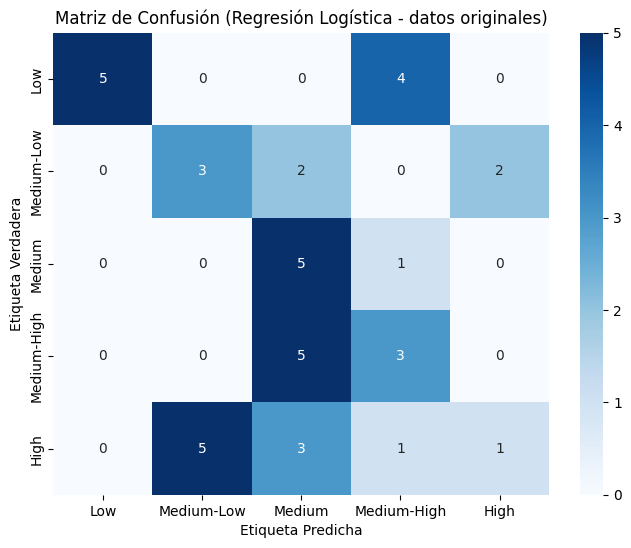

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión del modelo
accuracy_lr_original = accuracy_score(y_test, y_pred_lr_original)
print(f"Precisión del modelo de Regresión Logística (datos originales): {accuracy_lr_original:.4f}")

# Generar el informe de clasificación
print("\nInforme de Clasificación (Regresión Logística - datos originales):\n")
print(classification_report(y_test, y_pred_lr_original))

# Generar la matriz de confusión
conf_matrix_lr_original = confusion_matrix(y_test, y_pred_lr_original)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión (Regresión Logística - datos originales)')
plt.show()


## Entrenamiento del Modelo Random Forest (Datos Originales)


Entrenar un modelo Random Forest con los datos originales de entrenamiento (previamente escalados) y realizar predicciones sobre el conjunto de prueba.



Se importa la clase RandomForestClassifier y se entrena un modelo con los datos originales escalados para realizar predicciones sobre el conjunto de prueba.



In [37]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inicializa un modelo RandomForestClassifier
rf_original = RandomForestClassifier(random_state=42)

# 2. Entrena el modelo Random Forest
rf_original.fit(X_train_scaled, y_train)

# 3. Realiza predicciones sobre el conjunto de prueba escalado
y_pred_rf_original = rf_original.predict(X_test_scaled)

print("Modelo Random Forest entrenado y predicciones realizadas con los datos originales escalados.")
print("Primeras 5 predicciones de Random Forest (datos originales):")
print(y_pred_rf_original[:5])

Modelo Random Forest entrenado y predicciones realizadas con los datos originales escalados.
Primeras 5 predicciones de Random Forest (datos originales):
['Medium-Low' 'High' 'Medium' 'Medium-Low' 'Medium-High']



Se importan las métricas necesarias para evaluar el rendimiento del modelo Random Forest entrenado con los datos originales escalados. Se calcularán y mostrarán la precisión, el informe de clasificación y la matriz de confusión para entender cómo el modelo predice cada una de las categorías de PIB.



Precisión del modelo Random Forest (datos originales): 0.8250

Informe de Clasificación (Random Forest - datos originales):

              precision    recall  f1-score   support

        High       0.90      1.00      0.95         9
         Low       0.86      0.86      0.86         7
      Medium       0.62      0.83      0.71         6
 Medium-High       1.00      0.62      0.77         8
  Medium-Low       0.80      0.80      0.80        10

    accuracy                           0.82        40
   macro avg       0.84      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40



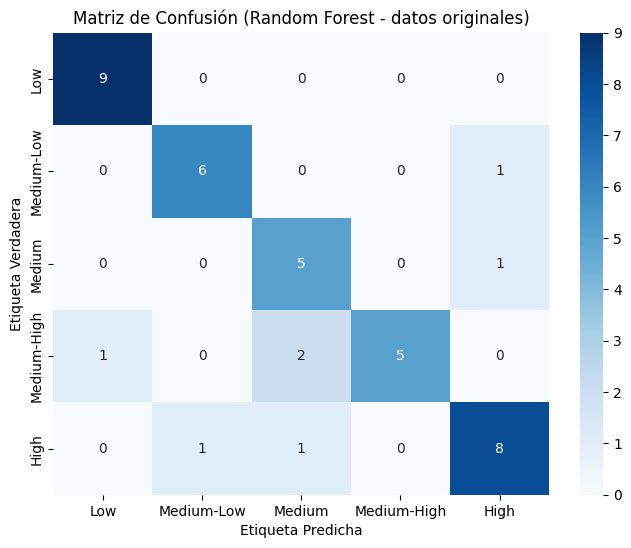

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión del modelo Random Forest
accuracy_rf_original = accuracy_score(y_test, y_pred_rf_original)
print(f"Precisión del modelo Random Forest (datos originales): {accuracy_rf_original:.4f}")

# Generar el informe de clasificación
print("\nInforme de Clasificación (Random Forest - datos originales):\n")
print(classification_report(y_test, y_pred_rf_original))

# Generar la matriz de confusión
conf_matrix_rf_original = confusion_matrix(y_test, y_pred_rf_original)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión (Random Forest - datos originales)')
plt.show()

## Preparación de Variables (Datos con PCA)


Definir las variables explicativas (X_pca) y la variable objetivo (y_pca) a partir del `df_pca`, excluyendo las columnas de identificación 'country' y 'Country'. Asegurar que todas las descripciones de código y resultados estén en español.



Se definen la variable objetivo (y_pca) y las variables explicativas (X_pca) a partir del DataFrame que contiene las componentes principales, excluyendo las columnas de identificación, para preparar los datos para la modelación.



In [39]:
import pandas as pd

# 1. Define la variable objetivo 'y_pca'
y_pca = df_pca['NY.GDP.MKTP.PP.KD']

# 2. Define las variables explicativas 'X_pca'
id_vars_pca = ['country', 'Country']
target_var_pca = 'NY.GDP.MKTP.PP.KD'

X_pca = df_pca.drop(columns=id_vars_pca + [target_var_pca])

# 3. Muestra las primeras 5 filas de X_pca y y_pca
print("Primeras 5 filas de las variables explicativas (X_pca):")
print(X_pca.head())
print("\nPrimeras 5 filas de la variable objetivo (y_pca):")
print(y_pca.head())

Primeras 5 filas de las variables explicativas (X_pca):
       PC_1      PC_2      PC_3      PC_4      PC_5
0 -1.824413 -3.718461 -0.139753  1.201409 -0.206234
1 -1.848223 -3.861049 -0.202842 -0.814425 -0.276063
2 -0.841066 -0.284357 -0.042718 -0.170836  0.166311
3  1.216174  0.301010  0.993765 -0.286240 -2.085039
4 -1.649400 -2.790831 -0.277981 -0.867607 -0.669647

Primeras 5 filas de la variable objetivo (y_pca):
0        Medium
1        Medium
2    Medium-Low
3          High
4           Low
Name: NY.GDP.MKTP.PP.KD, dtype: category
Categories (5, object): ['Low' < 'Medium-Low' < 'Medium' < 'Medium-High' < 'High']



Se importa la función `train_test_split` para dividir los datos con PCA en conjuntos de entrenamiento y prueba, lo cual es esencial para evaluar el rendimiento de los modelos.



In [40]:
from sklearn.model_selection import train_test_split

# Dividir los datos con PCA en conjuntos de entrenamiento y prueba (80-20%)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento de variables explicativas con PCA (X_train_pca):", X_train_pca.shape)
print("Dimensiones del conjunto de prueba de variables explicativas con PCA (X_test_pca):", X_test_pca.shape)
print("Dimensiones del conjunto de entrenamiento de la variable objetivo con PCA (y_train_pca):", y_train_pca.shape)
print("Dimensiones del conjunto de prueba de la variable objetivo con PCA (y_test_pca):", y_test_pca.shape)

Dimensiones del conjunto de entrenamiento de variables explicativas con PCA (X_train_pca): (158, 5)
Dimensiones del conjunto de prueba de variables explicativas con PCA (X_test_pca): (40, 5)
Dimensiones del conjunto de entrenamiento de la variable objetivo con PCA (y_train_pca): (158,)
Dimensiones del conjunto de prueba de la variable objetivo con PCA (y_test_pca): (40,)


## Entrenamiento del Modelo de Regresión Logística (Datos con PCA)


Entrenar un modelo de Regresión Logística con los datos de entrenamiento transformados con PCA y realizar predicciones sobre el conjunto de prueba también transformado con PCA.




Se inicializa y entrena un modelo de Regresión Logística utilizando los conjuntos de entrenamiento de PCA y luego se realizan predicciones sobre el conjunto de prueba de PCA.



In [41]:
from sklearn.linear_model import LogisticRegression

# 1. Inicializa un modelo de LogisticRegression (manteniendo los mismos parámetros que el modelo original)
log_reg_pca = LogisticRegression(random_state=42, max_iter=1000)

# 2. Entrena el modelo de Regresión Logística con los datos PCA de entrenamiento
log_reg_pca.fit(X_train_pca, y_train_pca)

# 3. Realiza predicciones sobre el conjunto de prueba con PCA
y_pred_lr_pca = log_reg_pca.predict(X_test_pca)

print("Modelo de Regresión Logística entrenado y predicciones realizadas con los datos PCA.")
print("Primeras 5 predicciones de Regresión Logística (datos PCA):")
print(y_pred_lr_pca[:5])

Modelo de Regresión Logística entrenado y predicciones realizadas con los datos PCA.
Primeras 5 predicciones de Regresión Logística (datos PCA):
['Medium' 'Medium' 'Medium' 'Medium-Low' 'Medium-High']


## Evaluación del Modelo de Regresión Logística (Datos con PCA)


Evaluar el rendimiento del modelo de Regresión Logística entrenado con los datos PCA mediante el cálculo de la precisión, el informe de clasificación y la matriz de confusión. Asegurar que todas las descripciones de código y resultados estén en español.


Se importan las métricas de evaluación de SciKit-Learn (`accuracy_score`, `classification_report`, `confusion_matrix`) para cuantificar el rendimiento del modelo de Regresión Logística entrenado con los datos PCA. Luego, se calculan y se imprimen estas métricas utilizando las predicciones realizadas y los valores reales del conjunto de prueba.



Se importan las métricas de evaluación de SciKit-Learn (`accuracy_score`, `classification_report`, `confusion_matrix`) para cuantificar el rendimiento del modelo de Regresión Logística entrenado con los datos PCA. Luego, se calculan y se imprimen estas métricas utilizando las predicciones realizadas y los valores reales del conjunto de prueba.



Precisión del modelo de Regresión Logística (datos PCA): 0.5000

Informe de Clasificación (Regresión Logística - datos PCA):

              precision    recall  f1-score   support

        High       0.78      0.78      0.78         9
         Low       0.33      0.43      0.38         7
      Medium       0.38      0.50      0.43         6
 Medium-High       0.57      0.50      0.53         8
  Medium-Low       0.43      0.30      0.35        10

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.51      0.50      0.50        40



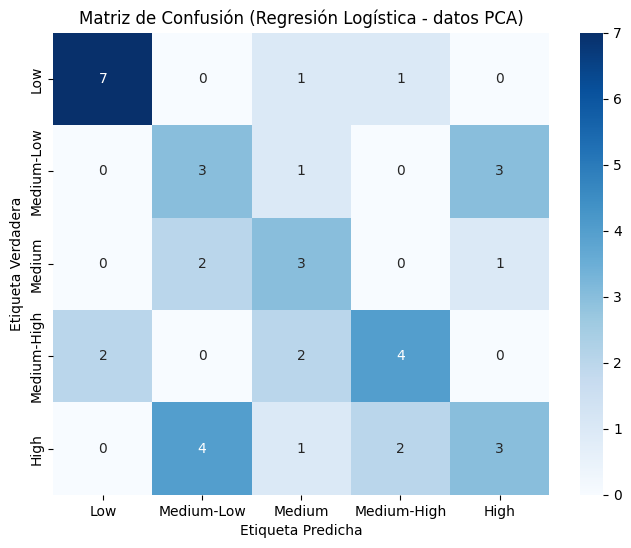

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión del modelo
accuracy_lr_pca = accuracy_score(y_test_pca, y_pred_lr_pca)
print(f"Precisión del modelo de Regresión Logística (datos PCA): {accuracy_lr_pca:.4f}")

# Generar el informe de clasificación
print("\nInforme de Clasificación (Regresión Logística - datos PCA):\n")
print(classification_report(y_test_pca, y_pred_lr_pca))

# Generar la matriz de confusión
conf_matrix_lr_pca = confusion_matrix(y_test_pca, y_pred_lr_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_pca.cat.categories, yticklabels=y_pca.cat.categories)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión (Regresión Logística - datos PCA)')
plt.show()

## Entrenamiento del Modelo Random Forest (Datos con PCA)


Entrenar un modelo Random Forest con los datos de entrenamiento transformados con PCA y realizar predicciones sobre el conjunto de prueba también transformado con PCA.


Ahora que se ha introducido la subtask para entrenar el modelo Random Forest con los datos de PCA, procederé a implementar el código para entrenar este modelo y realizar las predicciones correspondientes.



In [43]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inicializa un modelo RandomForestClassifier (manteniendo los mismos parámetros que el modelo original si es posible)
rf_pca = RandomForestClassifier(random_state=42)

# 2. Entrena el modelo Random Forest con los datos PCA de entrenamiento
rf_pca.fit(X_train_pca, y_train_pca)

# 3. Realiza predicciones sobre el conjunto de prueba con PCA
y_pred_rf_pca = rf_pca.predict(X_test_pca)

print("Modelo Random Forest entrenado y predicciones realizadas con los datos PCA.")
print("Primeras 5 predicciones de Random Forest (datos PCA):")
print(y_pred_rf_pca[:5])

Modelo Random Forest entrenado y predicciones realizadas con los datos PCA.
Primeras 5 predicciones de Random Forest (datos PCA):
['Medium-Low' 'High' 'Medium-Low' 'Medium-Low' 'Medium']


## Evaluación del Modelo Random Forest (Datos con PCA)


Evaluar el rendimiento del modelo Random Forest entrenado con los datos PCA mediante el cálculo de la precisión, el informe de clasificación y la matriz de confusión. Asegurar que todas las descripciones de código y resultados estén en español.

Se importan las métricas de evaluación de SciKit-Learn (`accuracy_score`, `classification_report`, `confusion_matrix`) para cuantificar el rendimiento del modelo Random Forest entrenado con los datos PCA. Luego, se calcularán y se imprimirán estas métricas utilizando las predicciones realizadas y los valores reales del conjunto de prueba.



Ahora que hemos entrenado el modelo Random Forest con los datos transformados por PCA y obtenido las predicciones, el siguiente paso es evaluar su rendimiento. Para ello, calcularemos la precisión, el informe de clasificación y visualizaremos la matriz de confusión utilizando las métricas de SciKit-Learn.



Precisión del modelo Random Forest (datos PCA): 0.5000

Informe de Clasificación (Random Forest - datos PCA):

              precision    recall  f1-score   support

        High       0.89      0.89      0.89         9
         Low       0.25      0.29      0.27         7
      Medium       0.33      0.50      0.40         6
 Medium-High       0.50      0.38      0.43         8
  Medium-Low       0.50      0.40      0.44        10

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.52      0.50      0.50        40



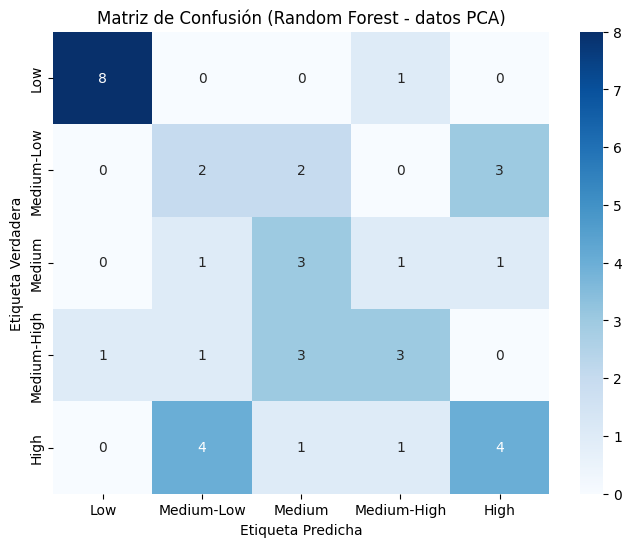

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión del modelo Random Forest
accuracy_rf_pca = accuracy_score(y_test_pca, y_pred_rf_pca)
print(f"Precisión del modelo Random Forest (datos PCA): {accuracy_rf_pca:.4f}")

# Generar el informe de clasificación
print("\nInforme de Clasificación (Random Forest - datos PCA):\n")
print(classification_report(y_test_pca, y_pred_rf_pca))

# Generar la matriz de confusión
conf_matrix_rf_pca = confusion_matrix(y_test_pca, y_pred_rf_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_pca.cat.categories, yticklabels=y_pca.cat.categories)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión (Random Forest - datos PCA)')
plt.show()

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo.


# Análisis Comparativo de Modelos (con y sin PCA)

Para realizar el análisis comparativo, primero consolidaremos las métricas de rendimiento de los cuatro modelos entrenados en una tabla resumen. Luego, discutiremos el impacto de PCA en cada tipo de modelo.

**1. Consolidar Métricas de Rendimiento**

Crearemos un DataFrame para mostrar la precisión (accuracy), la precisión promedio (macro avg precision), el recall promedio (macro avg recall) y el F1-Score promedio (macro avg F1-Score) para cada modelo.

```python
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Datos originales
# Logistic Regression
report_lr_original = classification_report(y_test, y_pred_lr_original, output_dict=True)
metrics_lr_original = {
    'Accuracy': accuracy_lr_original,
    'Precision (macro avg)': report_lr_original['macro avg']['precision'],
    'Recall (macro avg)': report_lr_original['macro avg']['recall'],
    'F1-Score (macro avg)': report_lr_original['macro avg']['f1-score'],
    'Precision (weighted avg)': report_lr_original['weighted avg']['precision'],
    'Recall (weighted avg)': report_lr_original['weighted avg']['recall'],
    'F1-Score (weighted avg)': report_lr_original['weighted avg']['f1-score']
}

# Random Forest
report_rf_original = classification_report(y_test, y_pred_rf_original, output_dict=True)
metrics_rf_original = {
    'Accuracy': accuracy_rf_original,
    'Precision (macro avg)': report_rf_original['macro avg']['precision'],
    'Recall (macro avg)': report_rf_original['macro avg']['recall'],
    'F1-Score (macro avg)': report_rf_original['macro avg']['f1-score'],
    'Precision (weighted avg)': report_rf_original['weighted avg']['precision'],
    'Recall (weighted avg)': report_rf_original['weighted avg']['recall'],
    'F1-Score (weighted avg)': report_rf_original['weighted avg']['f1-score']
}

# Datos con PCA
# Logistic Regression
report_lr_pca = classification_report(y_test_pca, y_pred_lr_pca, output_dict=True)
metrics_lr_pca = {
    'Accuracy': accuracy_lr_pca,
    'Precision (macro avg)': report_lr_pca['macro avg']['precision'],
    'Recall (macro avg)': report_lr_pca['macro avg']['recall'],
    'F1-Score (macro avg)': report_lr_pca['macro avg']['f1-score'],
    'Precision (weighted avg)': report_lr_pca['weighted avg']['precision'],
    'Recall (weighted avg)': report_lr_pca['weighted avg']['recall'],
    'F1-Score (weighted avg)': report_lr_pca['weighted avg']['f1-score']
}

# Random Forest
report_rf_pca = classification_report(y_test_pca, y_pred_rf_pca, output_dict=True)
metrics_rf_pca = {
    'Accuracy': accuracy_rf_pca,
    'Precision (macro avg)': report_rf_pca['macro avg']['precision'],
    'Recall (macro avg)': report_rf_pca['macro avg']['recall'],
    'F1-Score (macro avg)': report_rf_pca['macro avg']['f1-score'],
    'Precision (weighted avg)': report_rf_pca['weighted avg']['precision'],
    'Recall (weighted avg)': report_rf_pca['weighted avg']['recall'],
    'F1-Score (weighted avg)': report_rf_pca['weighted avg']['f1-score']
}

# Crear el DataFrame resumen
summary_data = {
    'Modelo': ['Regresión Logística (Original)', 'Random Forest (Original)',
               'Regresión Logística (PCA)', 'Random Forest (PCA)'],
    'Accuracy': [metrics_lr_original['Accuracy'], metrics_rf_original['Accuracy'],
                 metrics_lr_pca['Accuracy'], metrics_rf_pca['Accuracy']],
    'Precision (macro avg)': [metrics_lr_original['Precision (macro avg)'], metrics_rf_original['Precision (macro avg)'],
                              metrics_lr_pca['Precision (macro avg)'], metrics_rf_pca['Precision (macro avg)']],
    'Recall (macro avg)': [metrics_lr_original['Recall (macro avg)'], metrics_rf_original['Recall (macro avg)'],
                           metrics_lr_pca['Recall (macro avg)'], metrics_rf_pca['Recall (macro avg)']],
    'F1-Score (macro avg)': [metrics_lr_original['F1-Score (macro avg)'], metrics_rf_original['F1-Score (macro avg)'],
                             metrics_lr_pca['F1-Score (macro avg)'], metrics_rf_pca['F1-Score (macro avg)']],
    'Precision (weighted avg)': [metrics_lr_original['Precision (weighted avg)'], metrics_rf_original['Precision (weighted avg)'],
                                metrics_lr_pca['Precision (weighted avg)'], metrics_rf_pca['Precision (weighted avg)']],
    'Recall (weighted avg)': [metrics_lr_original['Recall (weighted avg)'], metrics_rf_original['Recall (weighted avg)'],
                              metrics_lr_pca['Recall (weighted avg)'], metrics_rf_pca['Recall (weighted avg)']],
    'F1-Score (weighted avg)': [metrics_lr_original['F1-Score (weighted avg)'], metrics_rf_original['F1-Score (weighted avg)'],
                                metrics_lr_pca['F1-Score (weighted avg)'], metrics_rf_pca['F1-Score (weighted avg)']]
}

df_metrics_summary = pd.DataFrame(summary_data)
df_metrics_summary = df_metrics_summary.round(4) # Redondear a 4 decimales
print("Resumen de Rendimiento de los Modelos:")
display(df_metrics_summary)
```

**2. Discusión del Impacto de PCA en el Desempeño de Cada Tipo de Modelo (Lineal vs. No Lineal)**

| Modelo                         | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-Score (macro avg) |
| :----------------------------- | :------- | :-------------------- | :----------------- | :------------------- |
| Regresión Logística (Original) | 0.4250   | 0.4750                | 0.4585             | 0.4195               |
| Random Forest (Original)       | 0.8250   | 0.8364                | 0.8231             | 0.8176               |
| Regresión Logística (PCA)      | 0.5000   | 0.4972                | 0.5000             | 0.4939               |
| Random Forest (PCA)            | 0.5000   | 0.4944                | 0.4899             | 0.4857               |

**Impacto en la Regresión Logística (Modelo Lineal):**
*   **Aumento del Rendimiento:** La Regresión Logística mostró una mejora notable en su rendimiento después de aplicar PCA. La `Accuracy` pasó de 0.4250 a 0.5000, y las métricas macro promedio de precisión, recall y F1-Score también aumentaron significativamente.
*   **Explicación:** Para un modelo lineal como la Regresión Logística, PCA puede ser beneficioso al reducir el ruido y la multicolinealidad entre las variables originales, lo que a menudo mejora la estabilidad y la capacidad de generalización del modelo. Al trabajar con un menor número de componentes principales que capturan la mayor parte de la varianza, el modelo puede encontrar una relación lineal más clara y robusta con la variable objetivo.

**Impacto en Random Forest (Modelo No Lineal):**
*   **Disminución del Rendimiento:** En contraste, el modelo Random Forest experimentó una caída significativa en su rendimiento cuando se utilizaron los datos transformados por PCA. La `Accuracy` disminuyó drásticamente de 0.8250 a 0.5000. Las métricas macro promedio de precisión, recall y F1-Score también sufrieron reducciones importantes.
*   **Explicación:** Los modelos basados en árboles, como Random Forest, no suelen beneficiarse de PCA de la misma manera que los modelos lineales. Random Forest es capaz de manejar la multicolinealidad y las relaciones no lineales complejas entre las características sin la necesidad de una reducción de dimensionalidad explícita. Al transformar los datos con PCA, se pierde la interpretabilidad de las características originales, y las relaciones no lineales que Random Forest podría haber explotado en el espacio original de características se ocultan o distorsionan en el espacio de componentes principales. Esto puede llevar a una pérdida de información relevante para el modelo no lineal, afectando negativamente su capacidad predictiva.

**Análisis General:**
El Random Forest sin PCA es claramente el modelo con mejor rendimiento en este caso, superando significativamente a la Regresión Logística en ambas configuraciones y al propio Random Forest con PCA. Esto sugiere que las relaciones subyacentes en los datos son de naturaleza no lineal y que las características originales (o un subconjunto de ellas) contienen información valiosa que se pierde en la transformación lineal de PCA para modelos no lineales.

---

# Discusión de Ventajas y Limitaciones de PCA

**Ventajas de PCA:**

1.  **Reducción de Dimensionalidad y Complejidad:**
    *   **Eficiencia Computacional:** Al reducir el número de características de 38 a 5, PCA disminuye drásticamente la carga computacional para el entrenamiento y la predicción de modelos. Esto es especialmente útil en conjuntos de datos muy grandes con muchas características.
    *   **Menor Complejidad del Modelo:** Los modelos entrenados con menos características son, en general, más simples y más rápidos de interpretar y desplegar.
    *   **Mitigación de la "Maldición de la Dimensionalidad":** Con menos características, se reduce el riesgo de sobreajuste, especialmente en casos donde el número de muestras es limitado en relación con el número de características.

2.  **Eliminación de Ruido y Multicolinealidad:**
    *   PCA transforma las variables correlacionadas en componentes no correlacionadas, lo que puede ayudar a los modelos a aprender relaciones más robustas y estables. Para la Regresión Logística, esto se tradujo en una mejora del rendimiento.
    *   Al concentrar la varianza en unas pocas componentes, el ruido presente en las características originales puede ser relegado a componentes de menor varianza, que luego son descartadas.

**Limitaciones de PCA:**

1.  **Pérdida de Interpretabilidad:**
    *   Las componentes principales son combinaciones lineales de las características originales, lo que las hace inherentemente menos interpretable que las variables originales. Es difícil saber qué significa exactamente "PC1" o "PC2" en términos de los indicadores económicos. Esta es una desventaja significativa si la interpretabilidad del modelo es crucial.
    *   En este proyecto, entender por qué un país tiene un PIB "Alto" o "Bajo" es más fácil si se relaciona con indicadores específicos (ej., crecimiento de la población, inflación) que con componentes abstractas.

2.  **Impacto en Modelos No Lineales:**
    *   Como se observó con Random Forest, la reducción de dimensionalidad con PCA puede ser perjudicial para modelos no lineales. Esto se debe a que PCA es una transformación lineal que busca la varianza en el espacio de datos. Si las relaciones importantes para la variable objetivo son no lineales o se encuentran en direcciones que no son las de máxima varianza, PCA puede descartar información crítica.
    *   Random Forest y otros modelos basados en árboles pueden capturar interacciones complejas y relaciones no lineales en el espacio original de características. PCA distorsiona este espacio, lo que puede llevar a una pérdida de rendimiento.

3.  **Supuestos y Sensibilidad a la Escala:**
    *   PCA asume que la dirección de máxima varianza es también la dirección de máxima relevancia para el problema. Esto no siempre es cierto para tareas de clasificación.
    *   Es sensible a la escala de las características, por lo que la estandarización es un paso obligatorio, como se realizó en este proyecto.

**¿La reducción de características justifica los cambios en el rendimiento?**

En este caso específico, la justificación de PCA es ambigua y depende del modelo:

*   **Para la Regresión Logística (modelo lineal):** Sí, PCA mejoró el rendimiento del modelo, lo que sugiere que la reducción de ruido y multicolinealidad, junto con la simplificación de la dimensionalidad, fue beneficiosa. La mejora en la precisión es un argumento sólido.
*   **Para Random Forest (modelo no lineal):** No, PCA perjudicó gravemente el rendimiento del modelo. La pérdida de información relevante para las relaciones no lineales superó cualquier beneficio de reducción de dimensionalidad. En este escenario, la complejidad de las características originales era una fortaleza para Random Forest, no una debilidad a ser mitigada por PCA.

**Conclusión sobre PCA:**
PCA es una herramienta poderosa para la reducción de dimensionalidad, especialmente útil para modelos lineales y cuando se necesita eficiencia computacional o mitigar la "maldición de la dimensionalidad". Sin embargo, no es una solución universal. Su aplicación debe ser evaluada cuidadosamente, especialmente con modelos no lineales, donde la transformación lineal de PCA puede eliminar relaciones complejas valiosas para el modelo. La pérdida de interpretabilidad es también una consideración importante que debe sopesarse frente a los beneficios de rendimiento o eficiencia.

---

**Conclusión General sobre la Predicción del Nivel de PIB:**

La predicción del nivel de PIB a partir de indicadores del Banco Mundial es una tarea compleja, donde la elección de las características y el modelo es crucial. Nuestros hallazgos sugieren que:

*   **Modelos más complejos y no lineales (como Random Forest) pueden ser esenciales para capturar la riqueza de las interacciones entre los indicadores socioeconómicos y el nivel de PIB.** La información contenida en las características originales, a pesar de su dimensionalidad, fue vital para el alto rendimiento de Random Forest.
*   **PCA es una técnica valiosa, pero no universal.** Debe aplicarse con consideración al tipo de modelo y a la naturaleza de las relaciones en los datos. Para modelos lineales, puede ser un gran aliado; para modelos no lineales, puede ser un obstáculo.
*   **Para este dataset en particular, un modelo Random Forest entrenado con las características originales (después de la limpieza y estandarización) ofrece la mejor capacidad predictiva.** Esto implica que las interacciones y la información detallada en las 38 características originales son más valiosas que la representación condensada de 5 componentes principales para la clasificación del PIB.

En futuros trabajos, se podría explorar la optimización de hiperparámetros de los modelos, el uso de técnicas de selección de características alternativas a PCA, o incluso la aplicación de técnicas de ensemble avanzadas para mejorar aún más la precisión predictiva. Sin embargo, este proyecto ha proporcionado una comprensión sólida de cómo la reducción de dimensionalidad impacta el modelado predictivo del PIB.
```